# Przewidywanie wyniku meczu piłkarskiego

## Przygotowanie zbioru

Zacznijmy od wczytania danych

In [198]:
import pandas as pd
import numpy as np

df = pd.read_pickle('../data/ml_data.pkl')

In [199]:
df.head()

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_4_age,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year
0,24,2,1,1,0,0,0,0,0,0,...,21,21,22,23,27,27,26,19,2,2009
1,22,2,2,1,0,0,0,0,0,0,...,25,23,25,22,19,29,23,21,12,2010
2,8,0,2,1,0,0,0,0,0,0,...,24,22,25,22,20,19,22,21,9,2010
3,6,2,2,1,0,0,0,0,0,0,...,24,22,29,25,22,19,22,21,9,2010
4,30,0,1,1,0,0,0,0,0,0,...,23,23,29,23,25,19,23,21,3,2011


In [200]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

Popatrzmy na kolumny jakie ma nasza wczytana tabela

In [201]:
print_full(df.columns.values)

array(['stage', 'home_team_goal', 'away_team_goal',
       'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositionin

Nasze dane składają się z:
- kolejka rozgrywania meczu,
- liczba strzelonych goli przez drużynę grającą u siebie
- liczba strzelonych goli przez drużynę grającą na wyjeździe
- liga rozgrywania meczu (one hot encoding)
- średnie kursy bukmacherów
- statystki drużyny z gry FIFA (0-100),
- statystyki piłkarz z gry FIFA (0-100)
- data rozegrania meczu (miesiąc, rok)

Jako, że chcemy przewidywać, która drużyna wygra lub czy będzie remis musimy zmienić kolumny z golami strzelonymi przez drużyny na one hot encoding

In [202]:
df["result"] = df.apply(lambda r: (-1 if r["home_team_goal"] > r["away_team_goal"] else 1 if r["home_team_goal"] < r["away_team_goal"] else 0), axis=1)

In [203]:
df['result']

0       -1
1        0
2        1
3        0
4        1
        ..
19607   -1
19608   -1
19609    0
19610   -1
19611   -1
Name: result, Length: 19612, dtype: int64

In [204]:
df['home_team_goal']

0        2
1        2
2        0
3        2
4        0
        ..
19607    4
19608    3
19609    1
19610    2
19611    2
Name: home_team_goal, Length: 19612, dtype: int64

In [205]:
df['away_team_goal']

0        1
1        2
2        2
3        2
4        1
        ..
19607    0
19608    0
19609    1
19610    0
19611    0
Name: away_team_goal, Length: 19612, dtype: int64

In [206]:
df = pd.get_dummies(df, columns=['result'])

In [207]:
df

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year,result_-1,result_0,result_1
0,24,2,1,1,0,0,0,0,0,0,...,23,27,27,26,19,2,2009,1,0,0
1,22,2,2,1,0,0,0,0,0,0,...,22,19,29,23,21,12,2010,0,1,0
2,8,0,2,1,0,0,0,0,0,0,...,22,20,19,22,21,9,2010,0,0,1
3,6,2,2,1,0,0,0,0,0,0,...,25,22,19,22,21,9,2010,0,1,0
4,30,0,1,1,0,0,0,0,0,0,...,23,25,19,23,21,3,2011,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19607,28,4,0,0,0,0,1,0,0,0,...,26,32,29,26,29,4,2009,1,0,0
19608,12,3,0,0,0,0,1,0,0,0,...,30,27,31,25,28,11,2008,1,0,0
19609,20,1,1,0,0,0,1,0,0,0,...,30,29,32,25,29,2,2009,0,1,0
19610,18,2,0,0,0,0,1,0,0,0,...,30,27,32,27,29,1,2009,1,0,0


In [208]:
df = df.drop(["home_team_goal", "away_team_goal"], axis=1)

In [209]:
df = df.rename(columns={"result_-1": "win", "result_0": "draw", "result_1": "lost"})

In [210]:
print_full(df.head())

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,league_name_Switzerland Super League,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,home_team_buildUpPlaySpeed,home_team_buildUpPlayDribbling,home_team_buildUpPlayPassing,home_team_chanceCreationPassing,home_team_chanceCreationCrossing,home_team_chanceCreationShooting,home_team_defencePressure,home_team_defenceAggression,home_team_defenceTeamWidth,home_team_buildUpPlayPositioningClass_Free_Form,home_team_buildUpPlayPositioningClass_Organised,home_team_chanceCreationPositioningClass_Free_Form,home_team_chanceCreationPositioningClass_Organised,home_team_defenceDefenderLineClass_Cover,home_team_defenceDefenderLineClass_Offside_Trap,away_team_buildUpPlaySpeed,away_team_buildUpPlayDribbling,away_team_buildUpPlayPassing,away_team_chanceCreationPassing,away_team_chanceCreationCrossing,away_team_chanceCreationShooting,away_team_defencePressure,away_team_defenceAggression,away_team_defenceTeamWidth,away_team_buildUpPlayPositioningClass_Free_Form,away_team_buildUpPlayPositioningClass_Organised,away_team_chanceCreationPositioningClass_Free_Form,away_team_chanceCreationPositioningClass_Organised,away_team_defenceDefenderLineClass_Cover,away_team_defenceDefenderLineClass_Offside_Trap,home_player_1_height,home_player_1_weight,home_player_1_overall_rating,home_player_1_potential,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_1_preferred_foot_left,home_player_1_preferred_foot_right,home_player_2_height,home_player_2_weight,home_player_2_overall_rating,home_player_2_potential,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_preferred_foot_left,home_player_2_preferred_foot_right,home_player_3_height,home_player_3_weight,home_player_3_overall_rating,home_player_3_potential,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,

Popatrzmy jeszcze raz na kolumny jakie teraz mamy. Widzimy, że w zbiorze są kolumny na temat zakładów u bukmachera. Pozbędziemy się ich, ponieważ mogę wpływać na naszą sieć, a my chcemy przewidywać wyniki meczy na podstawie czynników, które mają na nie wpływ.

In [211]:
print_full(df.columns.values)

array(['stage', 'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositioningClass_Organised',
       'home_team_chance

In [212]:
df = df.drop(["avg_odds_home_win", "avg_odds_draw", "avg_odds_away_win", "month", "year"], axis=1)

In [213]:
df.describe()

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,...,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,win,draw,lost
count,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.0,19612.000000,19612.000000,...,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000
mean,18.650520,0.060983,0.151030,0.145880,0.121099,0.139914,0.103610,0.0,0.060932,0.078574,...,25.825668,26.062819,26.254130,25.536253,25.316235,25.596574,25.703447,0.459056,0.252549,0.288395
std,10.513613,0.239305,0.358087,0.352995,0.326251,0.346907,0.304762,0.0,0.239212,0.269080,...,3.821464,3.947676,3.974213,3.783744,3.818846,3.818628,3.828545,0.498333,0.434486,0.453027
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,23.000000,23.000000,23.000000,23.000000,22.000000,23.000000,23.000000,0.000000,0.000000,0.000000
50%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,26.000000,26.000000,26.000000,25.000000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000
75%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,28.000000,29.000000,29.000000,28.000000,28.000000,28.000000,28.000000,1.000000,1.000000,1.000000
max,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,40.000000,40.000000,40.000000,39.000000,40.000000,39.000000,38.000000,1.000000,1.000000,1.000000


Nasze dane składają się z:
- kolejka
- liga, w której rozgrywany jest mecz. Największa ilość meczy jest z ligi angielskiej i francuskiej, zaraz za nimi są liga hiszpańska i niemiecka. Ta informacja jest nam potrzebna
- kolejne kolumny to statystyki z gry FIFA drużyn i zawodników. Są to najważniejsze statystyki, od których na pewno zależy wynik meczu
- wiek zawodników. Według nas ma wpływ na wynik meczu dlatego uwzględnimy go w trenowaniu sieci
- rezultat meczu jako one hot encoding, gdzie win oznacza zwycięstwo drużyny, która gra u siebie. Analogicznie lost

### Skalowanie danych
Zanim przystąpimy do treningu naszej sieci przeskalujmy nasze dane do zakresu [0-1]. Kolumny jakie musimy przeskalować to:
- numer kolejki. Maksymalna liczba kolejek w lidze to 38, więc przeskalowanie będzie polegało na podzieleniu przez 38.
- statystyki drużyn: buildUpPlaySpeed, buildUpPlayDribbling, buildUpPlayPassing, chanceCreationPassing, chanceCreationCrossing, chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth. Są to atrybuty gry z FIFA, więc ich zakres to 0-100, więc wystarczy podzielić wartości przez 100.
- atrybuty piłkarzy: overall_rating, potential, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes. One również zawierają się w przedziale 0-100
- wzrost i waga piłkarzy. Podzielimy przez max wartość


In [214]:
df['stage'] = df['stage'] / 38

In [215]:
df = df.drop(["stage"], axis=1)

In [216]:
teams_attributes = [x for x in df.columns.values if (x.startswith('home_team') or x.startswith('away_team')) and not(x.endswith('Cover')) and not(x.endswith('Offside_Trap')) and not(x.endswith('Free_Form')) and not(x.endswith('_Organised'))]

In [217]:
teams_attributes

['home_team_buildUpPlaySpeed',
 'home_team_buildUpPlayDribbling',
 'home_team_buildUpPlayPassing',
 'home_team_chanceCreationPassing',
 'home_team_chanceCreationCrossing',
 'home_team_chanceCreationShooting',
 'home_team_defencePressure',
 'home_team_defenceAggression',
 'home_team_defenceTeamWidth',
 'away_team_buildUpPlaySpeed',
 'away_team_buildUpPlayDribbling',
 'away_team_buildUpPlayPassing',
 'away_team_chanceCreationPassing',
 'away_team_chanceCreationCrossing',
 'away_team_chanceCreationShooting',
 'away_team_defencePressure',
 'away_team_defenceAggression',
 'away_team_defenceTeamWidth']

In [218]:
players_attributes = [x for x in df.columns.values if (x.startswith('home_player') or x.startswith('away_player')) and not(x.endswith("_height")) and not(x.endswith("_weight")) and not(x.endswith("_preferred_foot_left")) and not(x.endswith("_preferred_foot_right")) and not(x.endswith("_age"))]

In [219]:
players_attributes

['home_player_1_overall_rating',
 'home_player_1_potential',
 'home_player_1_attacking_work_rate',
 'home_player_1_defensive_work_rate',
 'home_player_1_crossing',
 'home_player_1_finishing',
 'home_player_1_heading_accuracy',
 'home_player_1_short_passing',
 'home_player_1_volleys',
 'home_player_1_dribbling',
 'home_player_1_curve',
 'home_player_1_free_kick_accuracy',
 'home_player_1_long_passing',
 'home_player_1_ball_control',
 'home_player_1_acceleration',
 'home_player_1_sprint_speed',
 'home_player_1_agility',
 'home_player_1_reactions',
 'home_player_1_balance',
 'home_player_1_shot_power',
 'home_player_1_jumping',
 'home_player_1_stamina',
 'home_player_1_strength',
 'home_player_1_long_shots',
 'home_player_1_aggression',
 'home_player_1_interceptions',
 'home_player_1_positioning',
 'home_player_1_vision',
 'home_player_1_penalties',
 'home_player_1_marking',
 'home_player_1_standing_tackle',
 'home_player_1_sliding_tackle',
 'home_player_1_gk_diving',
 'home_player_1_gk_h

In [220]:
height_weight_age = [x for x in df.columns.values if x.endswith('height') or x.endswith('weight') or x.endswith('_age')]

In [221]:
height_weight_age

['home_player_1_height',
 'home_player_1_weight',
 'home_player_2_height',
 'home_player_2_weight',
 'home_player_3_height',
 'home_player_3_weight',
 'home_player_4_height',
 'home_player_4_weight',
 'home_player_5_height',
 'home_player_5_weight',
 'home_player_6_height',
 'home_player_6_weight',
 'home_player_7_height',
 'home_player_7_weight',
 'home_player_8_height',
 'home_player_8_weight',
 'home_player_9_height',
 'home_player_9_weight',
 'home_player_10_height',
 'home_player_10_weight',
 'home_player_11_height',
 'home_player_11_weight',
 'away_player_1_height',
 'away_player_1_weight',
 'away_player_2_height',
 'away_player_2_weight',
 'away_player_3_height',
 'away_player_3_weight',
 'away_player_4_height',
 'away_player_4_weight',
 'away_player_5_height',
 'away_player_5_weight',
 'away_player_6_height',
 'away_player_6_weight',
 'away_player_7_height',
 'away_player_7_weight',
 'away_player_8_height',
 'away_player_8_weight',
 'away_player_9_height',
 'away_player_9_weigh

In [222]:
df[teams_attributes] = df[teams_attributes] / 100

In [223]:
df[players_attributes] = df[players_attributes] / 100

In [224]:
df[height_weight_age] = df[height_weight_age] / df[height_weight_age].max()

In [225]:
df.describe()

,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,...,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,win,draw,lost
count,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.0,19612.000000,19612.000000,19612.000000,...,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000
mean,0.060983,0.151030,0.145880,0.121099,0.139914,0.103610,0.0,0.060932,0.078574,0.137977,...,0.645642,0.651570,0.656353,0.654776,0.632906,0.656322,0.676406,0.459056,0.252549,0.288395
std,0.239305,0.358087,0.352995,0.326251,0.346907,0.304762,0.0,0.239212,0.269080,0.344884,...,0.095537,0.098692,0.099355,0.097019,0.095471,0.097914,0.100751,0.498333,0.434486,0.453027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.400000,0.400000,0.400000,0.410256,0.400000,0.410256,0.421053,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.575000,0.575000,0.575000,0.589744,0.550000,0.589744,0.605263,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.650000,0.650000,0.650000,0.641026,0.625000,0.641026,0.657895,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.700000,0.725000,0.725000,0.717949,0.700000,0.717949,0.736842,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Wstępny model
Przewidywanie modelu możemy potraktować jako zadanie klasyfikacji wieloklasowej. W tym przypadku mecz możemy przyporządkować do jednej z 3 klas: wygrany, zremisowany, przegrany. Na wynik patrzymy okiem drużyny grającej u siebie. Na początek zaczniemy od najprostszej sieci składającej się z 4 warstw. Zanim ją zbudujemy, utwórzmy zbiór X i y.

In [226]:
input_shape = len(df.columns.values) - 3 
X = df.iloc[:, :-3].to_numpy()
y = df.iloc[:, -3:].to_numpy()
input_shape

865

In [227]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

num_classes = 3


model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 1024)              886784    
                                                                 
 dense_195 (Dense)           (None, 512)               524800    
                                                                 
 dense_196 (Dense)           (None, 256)               131328    
                                                                 
 dense_197 (Dense)           (None, 3)                 771       
                                                                 
Total params: 1,543,683
Trainable params: 1,543,683
Non-trainable params: 0
_________________________________________________________________


Zamiast używać `binary_crossentropy`, użyjemy `categorical_crossentropy`, która mierzy odległość między dwoma rozkładami prawdopodobieństwa:
* wynikiem rozkładu prawdopodobieństwa naszej sieci oraz
* prawdziwą dystrybucją etykiet.

Minimalizując odległość między tymi dwoma rozkładami, uczymy nasz model, aby wyprowadzał coś jak najbardziej zbliżonego do prawdziwych etykiet (co nazywamy prawdą fundamentalną (ground truth)).

Jako metrykę użyjemy accuracy

In [228]:
model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Podzielmy nasz zbiór na zbiór uczący i testowy w stosunku 80% do 20%. Następnie ze zbioru uczącego weźmiemy 20% jako zbiór walidacyjny

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Teraz wytrenujmy nasz model dla 1000 epok:

In [230]:
epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/100
99/99 [==============================] - 1s 7ms/step - loss: 1.0950 - accuracy: 0.4419 - val_loss: 1.0447 - val_accuracy: 0.4583
Epoch 2/100
99/99 [==============================] - 1s 7ms/step - loss: 1.0101 - accuracy: 0.5051 - val_loss: 0.9796 - val_accuracy: 0.5252
Epoch 3/100
99/99 [==============================] - 1s 7ms/step - loss: 0.9998 - accuracy: 0.5133 - val_loss: 1.0613 - val_accuracy: 0.4873
Epoch 4/100
99/99 [==============================] - 1s 7ms/step - loss: 0.9876 - accuracy: 0.5278 - val_loss: 0.9941 - val_accuracy: 0.5226
Epoch 5/100
99/99 [==============================] - 1s 7ms/step - loss: 0.9838 - accuracy: 0.5318 - val_loss: 1.0194 - val_accuracy: 0.4930
Epoch 6/100
99/99 [==============================] - 1s 7ms/step - loss: 0.9973 - accuracy: 0.5176 - val_loss: 1.0093 - val_accuracy: 0.4809
Epoch 7/100
99/99 [==============================] - 1s 7ms/step - loss: 0.9843 - accuracy: 0.5295 - val_loss: 0.9973 - val_accuracy: 0.5064
Epoch 8/100
9

In [231]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 0.9980 - accuracy: 0.5205


Przygotujmy sobie funkcje, które przydadzą nam się w dalszych praca. Chodzi o wykres porównujący loss i accuracy.

In [232]:
import matplotlib.pyplot as plt

In [233]:
def PlotLossComparison(loss1, val_loss1):
    plt.clf()
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss 1')
    plt.plot(epochs, val_loss1, 'b', label='Validation loss 1')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [234]:
def PlotAccuracyComparison(acc1, val_acc1):
    plt.clf()
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Pokażmy wykresy strat (loss) i dokładności (accuracy):

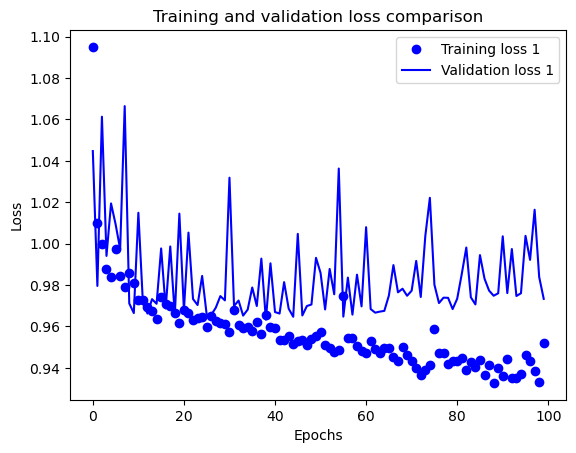

In [235]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

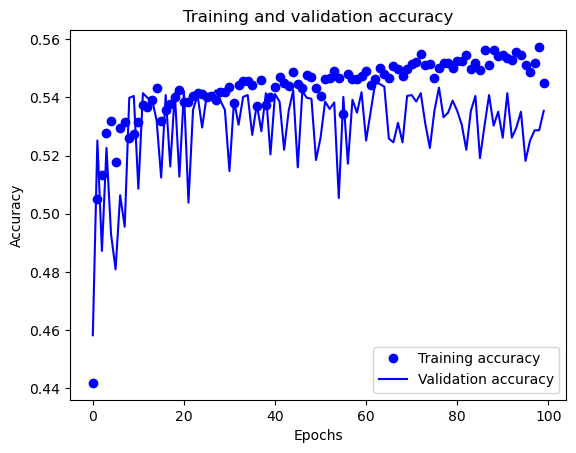

In [236]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Nasza sieć zaczyna się przeuczać po około 50 epokach. Wytrenujmy ją jeszcze raz przez 50 epok

In [237]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 50        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/50
99/99 [==============================] - 1s 7ms/step - loss: 1.0945 - accuracy: 0.4616 - val_loss: 1.0794 - val_accuracy: 0.4939
Epoch 2/50
99/99 [==============================] - 1s 6ms/step - loss: 1.0246 - accuracy: 0.4955 - val_loss: 0.9922 - val_accuracy: 0.5105
Epoch 3/50
99/99 [==============================] - 1s 6ms/step - loss: 0.9969 - accuracy: 0.5203 - val_loss: 1.0034 - val_accuracy: 0.5124
Epoch 4/50
99/99 [==============================] - 1s 7ms/step - loss: 0.9912 - accuracy: 0.5222 - val_loss: 0.9973 - val_accuracy: 0.5140
Epoch 5/50
99/99 [==============================] - 1s 6ms/step - loss: 0.9945 - accuracy: 0.5227 - val_loss: 0.9867 - val_accuracy: 0.5277
Epoch 6/50
99/99 [==============================] - 1s 7ms/step - loss: 0.9807 - accuracy: 0.5283 - val_loss: 1.0088 - val_accuracy: 0.5198
Epoch 7/50
99/99 [==============================] - 1s 6ms/step - loss: 0.9803 - accuracy: 0.5315 - val_loss: 1.0050 - val_accuracy: 0.5019
Epoch 8/50
99/99 [==

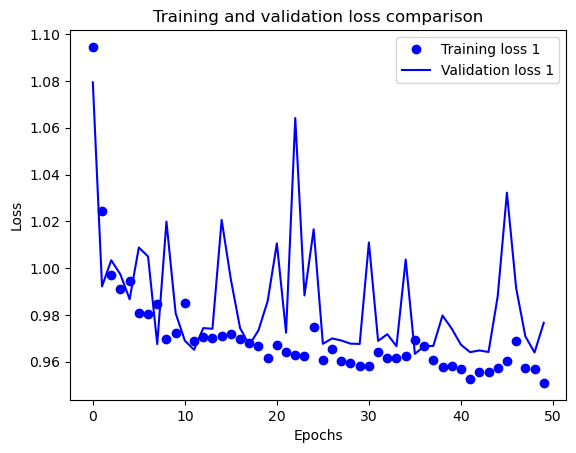

In [238]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

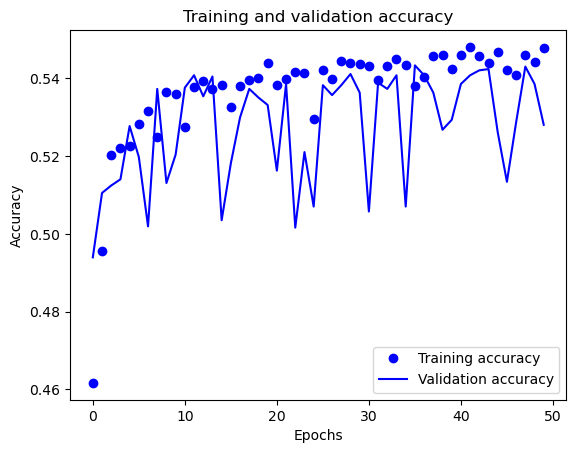

In [239]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Teraz nasz model nie przeuczł się za to uzyskał skuteczność na poziomie około 53%, co na pierwszy rzut oka wydaje się słabym wynikiem. Na koniec pokażemy skuteczność bukmacherów, gazet i ludzi, co zmieni nasz punkt widzenia. Celem tego notebook'a będzie uzyskanie skuteczności modelu na poziomie 60%

### Optymalizacja modelu
Jako kolejny etap przygotujmy sobie funkcję, która wyświetli macierz konfuzji.

<b>Macierz konfuzji</b> (`confusion matrix`) pokazuje nam, w ilu przypadkach dane testowe zostały poprawnie zaklasyfikowane (główna przekątna macierzy), w ilu niepoprawnie, oraz wzorce których klas byly najczęściej mylone z wzrocami innych klas. 
Macierz konfuzji pozwala przeanalizować, wzorce których klas są najczęściej błędnie klasyfikowane, oraz pozwalają podjąć działania zmierzające do wzmocnienia/powtórzenia procesu uczenia dla tych najtrudniej klasyfikowanych klas lub wzorców, ew. dokonanie augmentacji dla wzorców tych klas, o ile to możliwe. Dlatego w przypadku problemów klasyfikacji macierz konfuzji powinna zostać dokładnie przeanalizowana, a wnioski wykorzystane do poprawy klasyfikatora. Skupiamy się oczywiście na wzorcach tych klas, gdzie wartości poza główną przekątną macierzy są największe. Pomaga również obejrzenie przykładów testowych błędnie sklasyfikowanych, gdyż może się okazać, iż są błędnie przyporządkowane do etykiet albo nawet człowiek lub nikt nie jest w stanie tego zrobić poprawnie ze względu na słabą jakość, rozmycie lub inne czynniki (przekroczenie tzw. "human-level performance"). 

In [240]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
LABELS= ['Win', 'Draw', 'Lost']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

123/123 [==============================] - 0s 1ms/step


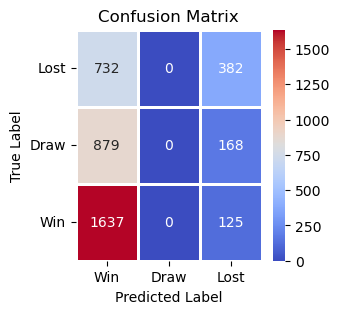

              precision    recall  f1-score   support

           0       0.50      0.93      0.65      1762
           1       0.00      0.00      0.00      1047
           2       0.57      0.34      0.43      1114

    accuracy                           0.51      3923
   macro avg       0.36      0.42      0.36      3923
weighted avg       0.39      0.51      0.41      3923



/Users/almazur/miniconda3/envs/nn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/almazur/miniconda3/envs/nn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/almazur/miniconda3/envs/nn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [241]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Jak wygląda liczba przypadków w naszym zbiorze treningowym?

In [242]:
np.sum(y_train, axis=0)

array([7241, 3906, 4542], dtype=uint64)

Nie wiemy jak wygląda zbiór walidacyjny, stanowi on 20% zbioru testowego, lecz nie wiem jak dużo meczy danego typu wpada do niego. Dlatego utwórzmy ten zbiór ręcznie

In [243]:
y_train.shape

(15689, 3)

In [244]:
X_val = X_train[-3000:]
y_val = y_train[-3000:]
X_train = X_train[:-3000]
y_train = y_train[:-3000]

Popatrzmy teraz jak rozkładają się mecze w zbiorze walidacyjnym

In [245]:
np.sum(y_val, axis=0)

array([1375,  757,  868], dtype=uint64)

Wygląda na to, że zbiór walidacyjny jest w porządku. Nauczmy jeszcze raz naszą sieć używając tego zbioru jako zbioru walidacyjnego

In [246]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_202 (Dense)           (None, 1024)              886784    
                                                                 
 dense_203 (Dense)           (None, 512)               524800    
                                                                 
 dense_204 (Dense)           (None, 256)               131328    
                                                                 
 dense_205 (Dense)           (None, 3)                 771       
                                                                 
Total params: 1,543,683
Trainable params: 1,543,683
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 1.0797 - accuracy: 0.4628 - val_loss: 1.0389 - val_accuracy: 0.5253
Epoch 2/100
100/100 [===========

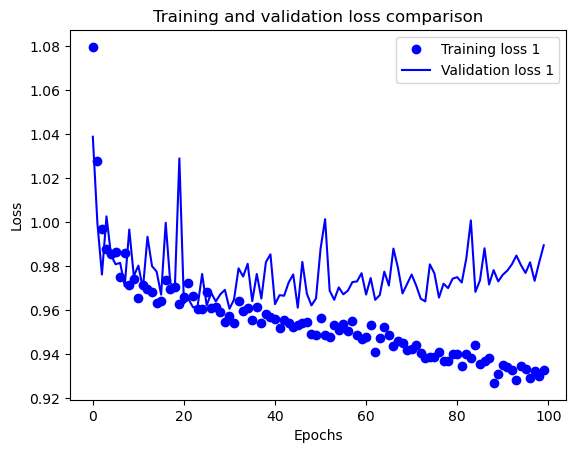

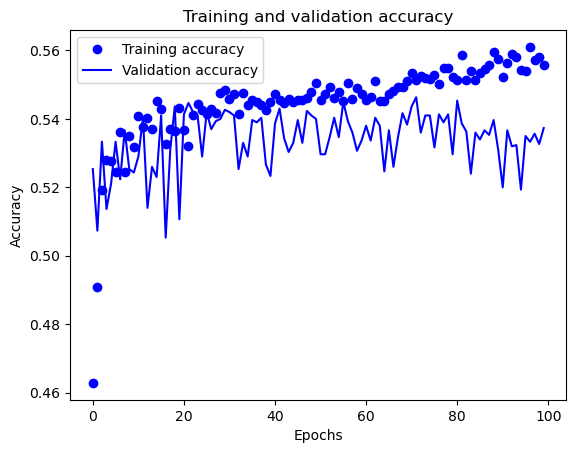

In [247]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Co się stanie, gdy zmniejszymy learning rate?

In [248]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_206 (Dense)           (None, 1024)              886784    
                                                                 
 dense_207 (Dense)           (None, 512)               524800    
                                                                 
 dense_208 (Dense)           (None, 256)               131328    
                                                                 
 dense_209 (Dense)           (None, 3)                 771       
                                                                 
Total params: 1,543,683
Trainable params: 1,543,683
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 1.0590 - accuracy: 0.4539 - val_loss: 1.0453 - val_accuracy: 0.4667
Epoch 2/100
100/100 [===========

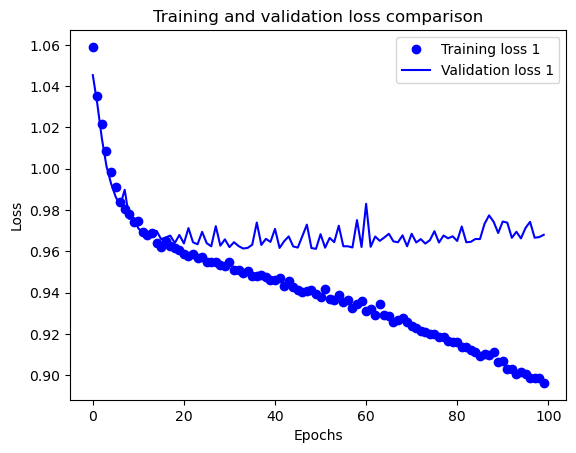

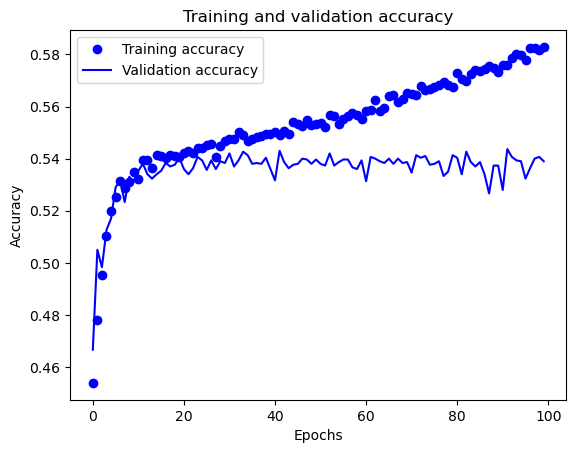

In [249]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [250]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 1ms/step - loss: 0.9966 - accuracy: 0.5136


Po zmniejszeniu learning_rate do 10^-5 po 20 epokach nasz model zaczyna zbyt nadmiernie dopasowywać się do zbioru, a accuracy zbioru walidacyjnego zatrzymuje się na 53%. Czy zmniejszenie złożoności modelu rozwiąże problem?

In [251]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 1024)              886784    
                                                                 
 dense_211 (Dense)           (None, 512)               524800    
                                                                 
 dense_212 (Dense)           (None, 3)                 1539      
                                                                 
Total params: 1,413,123
Trainable params: 1,413,123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 1.0554 - accuracy: 0.4606 - val_loss: 1.0385 - val_accuracy: 0.4707
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 1.0294 - accuracy: 0.4863 - val_loss: 1.0214 - val_accuracy: 0.4767
Epoch 3/100
100/100 [

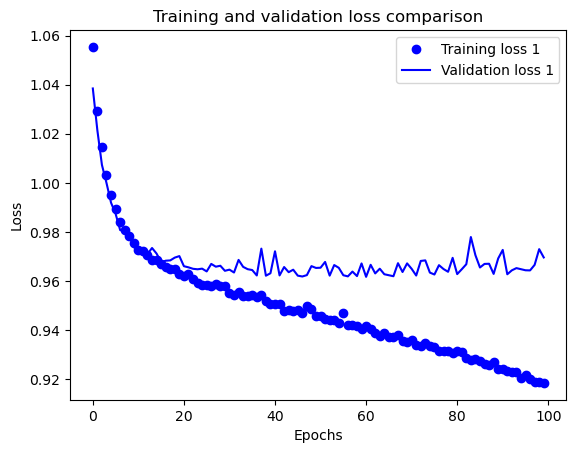

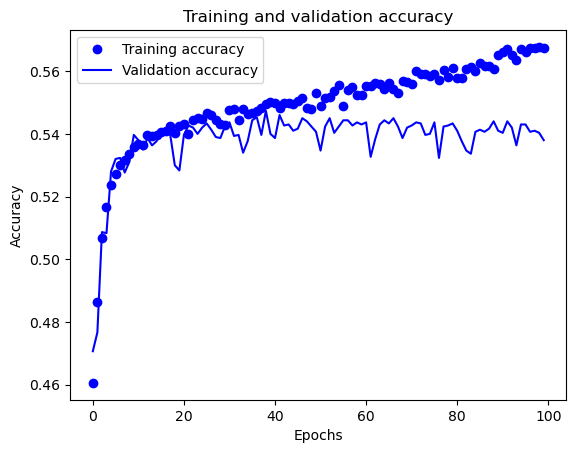

In [252]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Zmniejszenie liczby wartstw ukrytych nic nie zmieniło, czy zwiększenie złożoności modelu coś zmieni?

In [259]:
model1 = models.Sequential()
model1.add(layers.Dense(256, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(128, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(64, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(32, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(16, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(8, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_230 (Dense)           (None, 256)               221696    
                                                                 
 dropout_128 (Dropout)       (None, 256)               0         
                                                                 
 dense_231 (Dense)           (None, 128)               32896     
                                                                 
 dropout_129 (Dropout)       (None, 128)               0         
                                                                 
 dense_232 (Dense)           (None, 64)                8256      
                                                                 
 dropout_130 (Dropout)       (None, 64)                0         
                                                                 
 dense_233 (Dense)           (None, 32)              

In [260]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 711us/step - loss: 1.0020 - accuracy: 0.5195


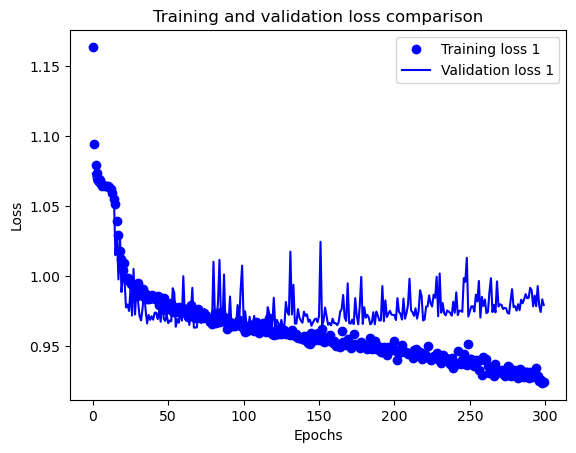

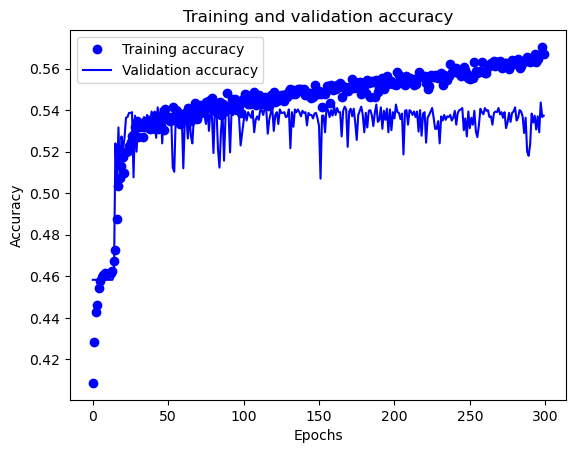

In [261]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Mozemy spróbować jeszcze bradziej zwiększyć złozoność modelu, jednocześnie zwiększając regularyzację, abu sprawdzić jak wpłynie to na wynik 
treningowy/walidacyjny. Wybieramy tutaj regularyzację L2, gdyz regularyzacja L1 moze prowadzic do całkowitego wyzerowania niektórych wag, 
a nie chcemy tak radykalnie odrzucać części danych  

Oprócz tego, mozemy spróbować zmniejszyć dropout. Losowe wyłączanie 30% neuronów w kazdej warstwie to dość duzo i moze utrudniać uczenie 
sieci. Spróbujmy zmniejszyć dropout do wartości 10%  

Ponadto, spróbujmy zmienić optymizer na Nadam, aby wziąć pod uwagę pęd zmiany gradientu. Aby jednak nasza sieć zbytnio nie 'skakała', 
zmniejszymy learning rate

In [256]:
from tensorflow.keras import regularizers

In [268]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_265 (Dense)           (None, 512)               443392    
                                                                 
 dropout_155 (Dropout)       (None, 512)               0         
                                                                 
 dense_266 (Dense)           (None, 256)               131328    
                                                                 
 dropout_156 (Dropout)       (None, 256)               0         
                                                                 
 dense_267 (Dense)           (None, 128)               32896     
                                                                 
 dropout_157 (Dropout)       (None, 128)               0         
                                                                 
 dense_268 (Dense)           (None, 64)              

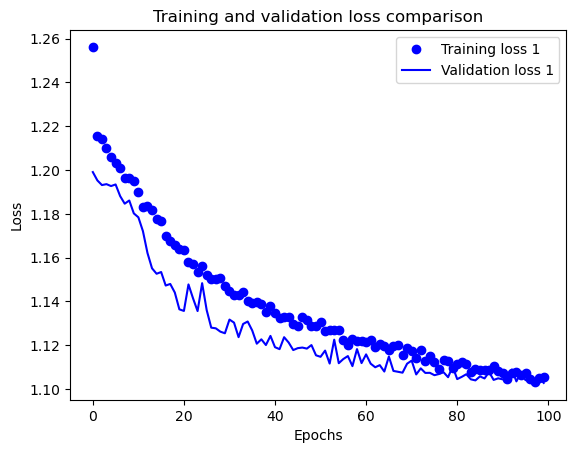

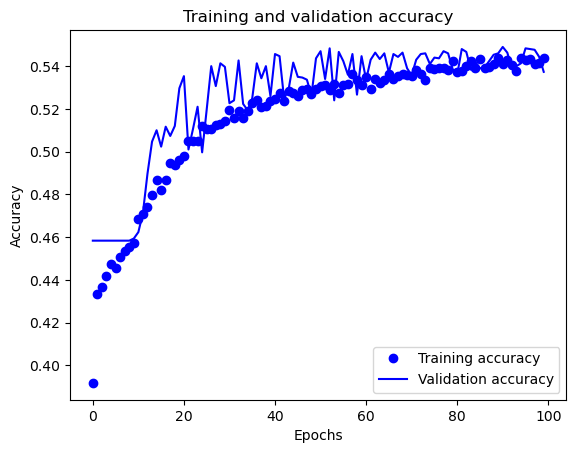

In [269]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Na powyzszych wykresach mozna zauwazyć, ze wyniki treningowe i walidacyjne zblizyły się do siebie i niemalze nakładają się, za wyjątkiem pewnych skoków na zbiorze walidacyjnym. Spróbujmy zatem wyszkolić sieć na większej ilości epok.

In [270]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_274 (Dense)           (None, 512)               443392    
                                                                 
 dropout_162 (Dropout)       (None, 512)               0         
                                                                 
 dense_275 (Dense)           (None, 256)               131328    
                                                                 
 dropout_163 (Dropout)       (None, 256)               0         
                                                                 
 dense_276 (Dense)           (None, 128)               32896     
                                                                 
 dropout_164 (Dropout)       (None, 128)               0         
                                                                 
 dense_277 (Dense)           (None, 64)              

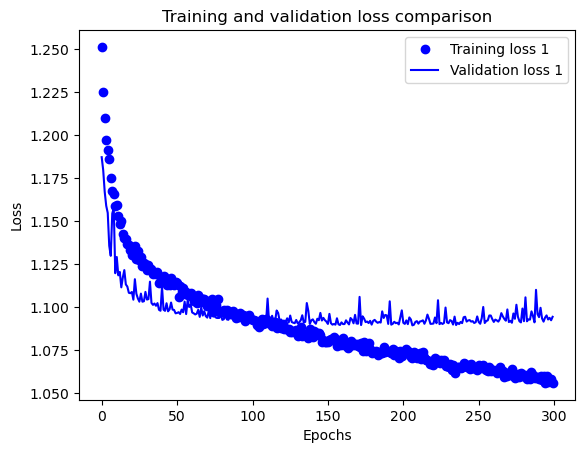

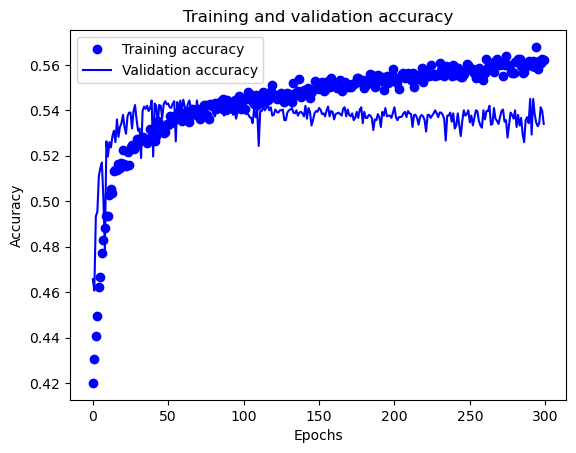

In [271]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Niestety do góry poszedł tylko wynik na zbiorze treningowym, spróbujmy ponownie, delikatnie zwiększyć regularyzację

In [272]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_283 (Dense)           (None, 512)               443392    
                                                                 
 dropout_169 (Dropout)       (None, 512)               0         
                                                                 
 dense_284 (Dense)           (None, 256)               131328    
                                                                 
 dropout_170 (Dropout)       (None, 256)               0         
                                                                 
 dense_285 (Dense)           (None, 128)               32896     
                                                                 
 dropout_171 (Dropout)       (None, 128)               0         
                                                                 
 dense_286 (Dense)           (None, 64)              

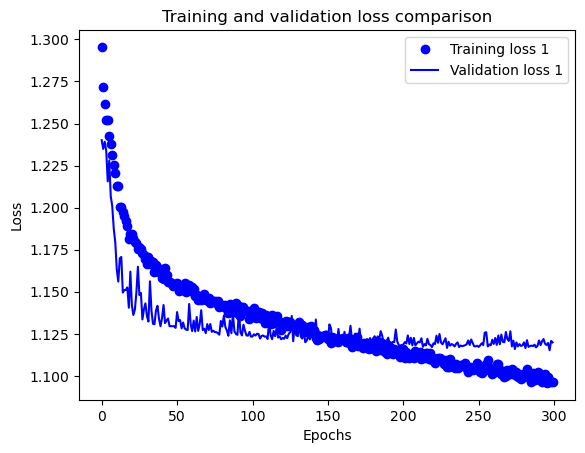

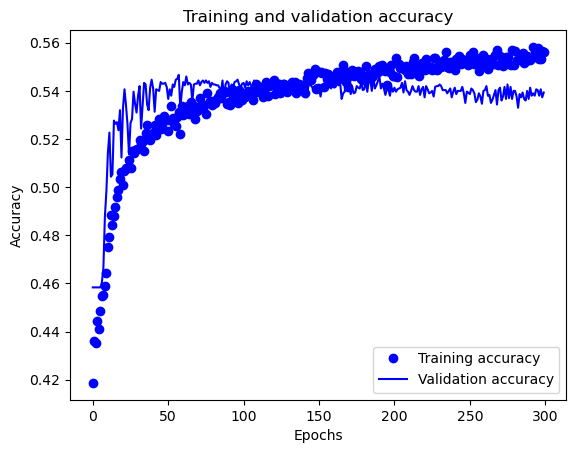

In [273]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Widzimy, że nasza sieć tak na prawdę nauczyła się typować tylko zwycięstwo lub porażkę. Spróbujmy zmniejszyć nasz zbiór do jednej ligi niech będzie to Premier League, ponieważ najwięcej meczy jest właśnie stąd. Zrobimy to, ponieważ gra w różnych ligach różni się od siebie. Do tego zmniejszymy liczbę atrybutów zostawiając tylko overall każdego zawodnika, ponieważ zmniejszy się liczba przykładów uczących